## Data Analysis Notebook for Watershed Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("data/Mindoro-Watersheds.csv")
df.head()

,name,area,circularity_ratio,population,annualcrop,builtup,closedforest,fishpond,grassland,inlandwater,mangroveforest,openforest,openbarren,perennialcrop,shrubs,woodedgrassland
0,Abra De Ilog Watershed 1,42.9996,0.458043,2570,0.0000,0.0000,0.0000,0.0000,0.2416,0.0000,0.0000,0.3631,0.0000,0.0309,0.2463,0.1181
1,Abra De Ilog Watershed 2,143.5730,0.528438,8606,0.1463,0.0083,0.0000,0.0000,0.2216,0.0121,0.0000,0.1018,0.0000,0.0000,0.4120,0.0979
2,Abra De Ilog-Mamburao Watershed,316.7610,0.294440,29586,0.1441,0.0033,0.0161,0.0000,0.2525,0.0101,0.0014,0.0539,0.0023,0.0031,0.3150,0.1982
3,Bansud-Bongabong Watershed,120.1510,0.372932,22127,0.1855,0.0112,0.0000,0.0000,0.0784,0.0152,0.0024,0.1355,0.0000,0.4759,0.0957,0.0000
4,Bongabong Watershed,79.9201,0.423343,11666,0.1831,0.0089,0.0000,0.0055,0.0319,0.0061,0.0020,0.0036,0.0011,0.6495,0.1082,0.0000


## Keep only the numeric columns

In [6]:
IRRELEVANT_COLS = ["name"]
numeric_cols = [col for col in df.columns if col not in IRRELEVANT_COLS]
df = df[numeric_cols]
df.head()

,area,circularity_ratio,population,annualcrop,builtup,closedforest,fishpond,grassland,inlandwater,mangroveforest,openforest,openbarren,perennialcrop,shrubs,woodedgrassland
0,42.9996,0.458043,2570,0.0000,0.0000,0.0000,0.0000,0.2416,0.0000,0.0000,0.3631,0.0000,0.0309,0.2463,0.1181
1,143.5730,0.528438,8606,0.1463,0.0083,0.0000,0.0000,0.2216,0.0121,0.0000,0.1018,0.0000,0.0000,0.4120,0.0979
2,316.7610,0.294440,29586,0.1441,0.0033,0.0161,0.0000,0.2525,0.0101,0.0014,0.0539,0.0023,0.0031,0.3150,0.1982
3,120.1510,0.372932,22127,0.1855,0.0112,0.0000,0.0000,0.0784,0.0152,0.0024,0.1355,0.0000,0.4759,0.0957,0.0000
4,79.9201,0.423343,11666,0.1831,0.0089,0.0000,0.0055,0.0319,0.0061,0.0020,0.0036,0.0011,0.6495,0.1082,0.0000


## Visualize the raw data
We will plot the histogram and QQ plots for each variable to inspect the data distribution.

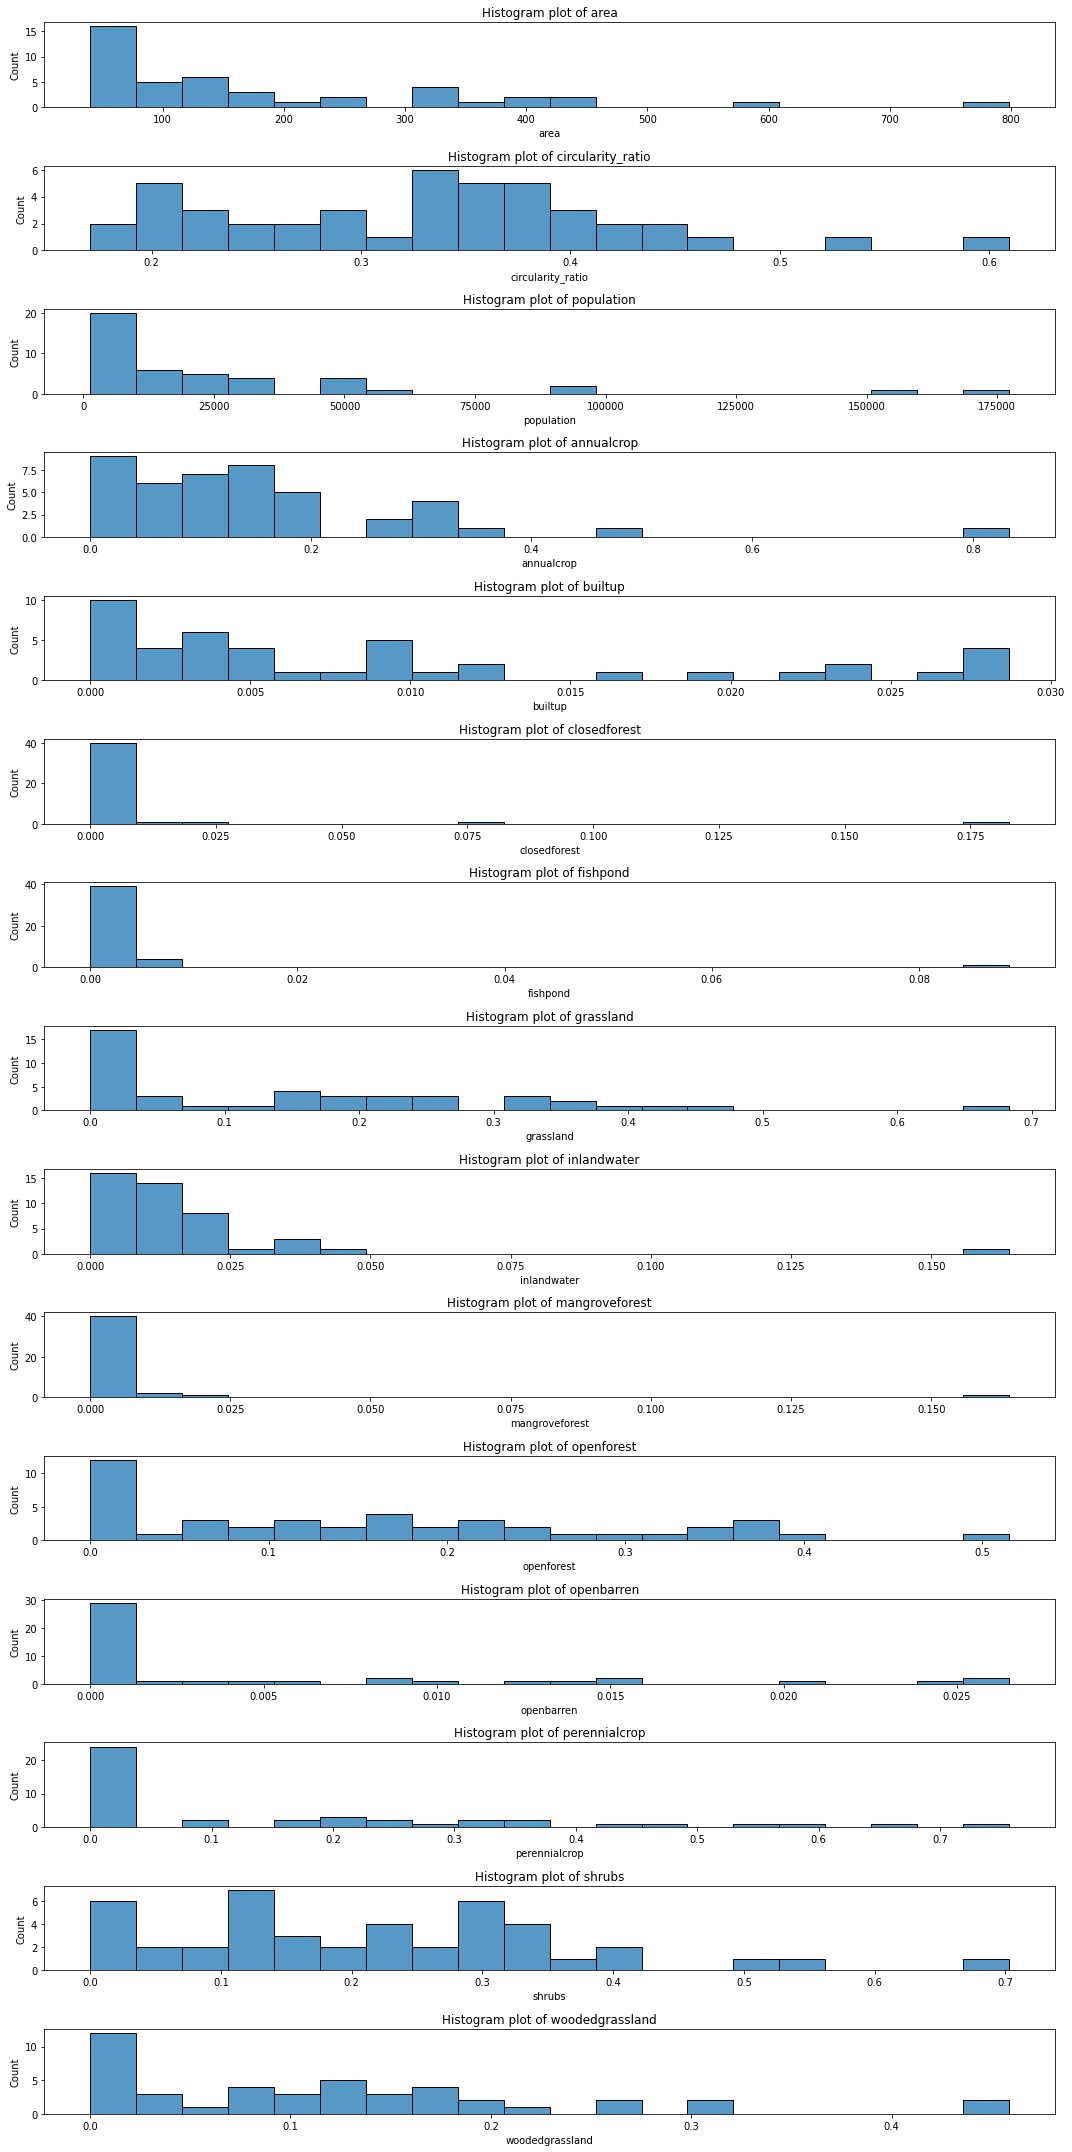

In [7]:
# construct histogram plot of each variable
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15,30))
for i, col in enumerate(numeric_cols):
    plt.sca(axes[i])
    axes[i].set_title(f"Histogram plot of {col}")
    nbins = 20
    sns.histplot(df[col], bins=nbins)
plt.tight_layout()
fig.savefig(f"plots/histogram_raw_data_{nbins}_bins.jpg")

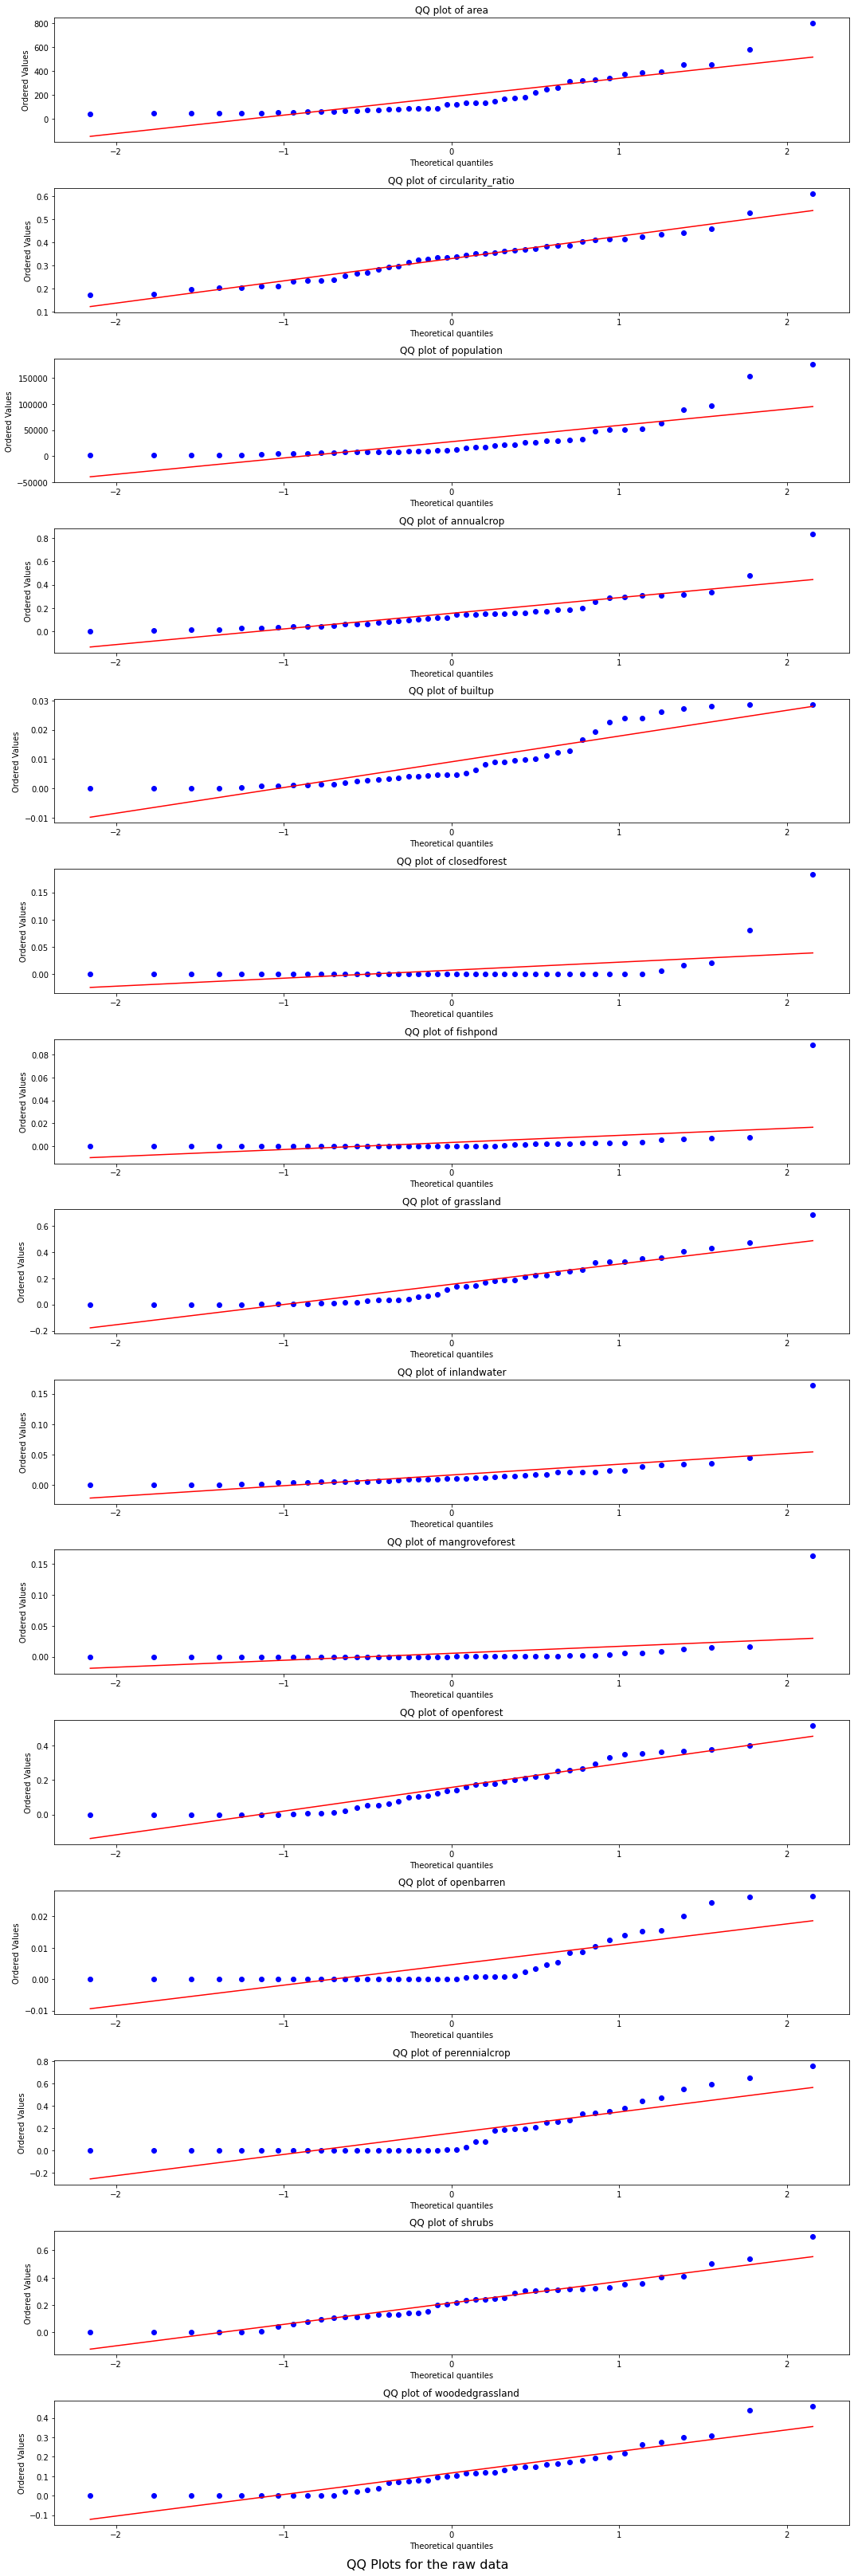

In [8]:
from scipy import stats
import seaborn as sns

# construct QQ plot of each variable (raw values)
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15,45))
fig.suptitle("QQ Plots for the raw data", y=0, fontsize=16)
for i, col in enumerate(numeric_cols):
    plt.sca(axes[i])
    stats.probplot(df[col], plot=sns.mpl.pyplot)
    axes[i].set_title(f"QQ plot of {col}")
plt.tight_layout()
fig.savefig("plots/qqplot_raw_data.jpg")

Based on the plots above, the data distribution of each variable looks far from the normal distribution. Let us test the normality of the raw data using the Jarque-Bera test. The Jarque Bera test only needs the kurtosis and skwewness of the distribution. The null hypothesis is that the data is normally distributed.

Large values for the Jarque-Bera statistic indicate that the distribution is not normal.

To apply Jarque-Bera, we should standardize the data. We will be testing the hypothesis if the standardized z-scores follow the standard normal with ```skewness=0``` and ```kurtosis=3```.

We will be using significance level $\alpha=0.05$ for the hypothesis testing.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stdized_df = pd.DataFrame(scaler.fit_transform(df))
stdized_df.columns = numeric_cols

jq_raw_data_results = []
for i, col in enumerate(numeric_cols):
    # perform jarque bera on standardized data
    results = stats.jarque_bera(stdized_df[col])
    # add to results
    results_dict = {}
    results_dict["variable"] = col
    results_dict["jq_statistic"] = results.statistic
    results_dict["p_value"] = results.pvalue
    jq_raw_data_results.append(results_dict)
jq_raw_data_df = pd.DataFrame(jq_raw_data_results)
jq_raw_data_df

,variable,jq_statistic,p_value
0,area,31.629568,1.354336e-07
1,circularity_ratio,1.594395,4.505900e-01
2,population,119.920106,0.000000e+00
3,annualcrop,158.495011,0.000000e+00
4,builtup,7.680919,2.148373e-02
5,closedforest,1459.353063,0.000000e+00
6,fishpond,2800.654056,0.000000e+00
7,grassland,10.668628,4.823219e-03
8,inlandwater,1364.994223,0.000000e+00
9,mangroveforest,2780.408533,0.000000e+00


From the results above we can see that when the p value is zero, the value of the statistic is large. We can filter out the variables that do not pass the test. The pvalue threshold will be $\alpha > 0.05$ We will reject the hypothesis that the data is normally distributed if the p value is less than 0.05.

A note from [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html):

Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.

Since there aren't a lot of samples, one may use alternative tests for normality such as: Anderson-Darling or Shapiro-Wilk. One may also combine the results from different tests to check if they are consistent. The tests however doesn't have that much statistical power since there are only a few samples.

One can see the available list of normality tests [here](https://en.wikipedia.org/wiki/Normality_test).

In [11]:
# filter out values with p value less than 0.05
is_not_normal = (jq_raw_data_df["p_value"] < 0.05)
jq_raw_data_df[is_not_normal]

,variable,jq_statistic,p_value
0,area,31.629568,1.354336e-07
2,population,119.920106,0.000000e+00
3,annualcrop,158.495011,0.000000e+00
4,builtup,7.680919,2.148373e-02
5,closedforest,1459.353063,0.000000e+00
6,fishpond,2800.654056,0.000000e+00
7,grassland,10.668628,4.823219e-03
8,inlandwater,1364.994223,0.000000e+00
9,mangroveforest,2780.408533,0.000000e+00
11,openbarren,25.197015,3.377052e-06


In [12]:
# filter out values with p value greater than 0.05
passing_jq_test = (jq_raw_data_df["p_value"] >= 0.05)
jq_raw_data_df[passing_jq_test]

,variable,jq_statistic,p_value
1,circularity_ratio,1.594395,0.450590
10,openforest,3.152073,0.206793
13,shrubs,4.738781,0.093538


From these the only variables whose raw data are probably normally distributed are:
* circularity_ratio
* openforest
* shrubs
Inspecting the JQ statistic, the values are small but not near 0. So we are not that confident in saying that these variables are normally distributed.

## Transformations to normalize the data

### Box-Cox of data + some constant

We will be using Box-Cox transform to transform the variables into something that's more normally distributed. For each variable we will be getting the optimal lambda.

However Box-Cox transforms only work for positive values. Since there are zero values, we will be adding a constant, say 1, for the transformation to work.

If the data has a reasonable minimum, it would help if the zero values are mapped to that value. Note that adding a large constant with high relative magnitude to the data, especially if they are small with values near zero will have weird results on the optimal lambda. 

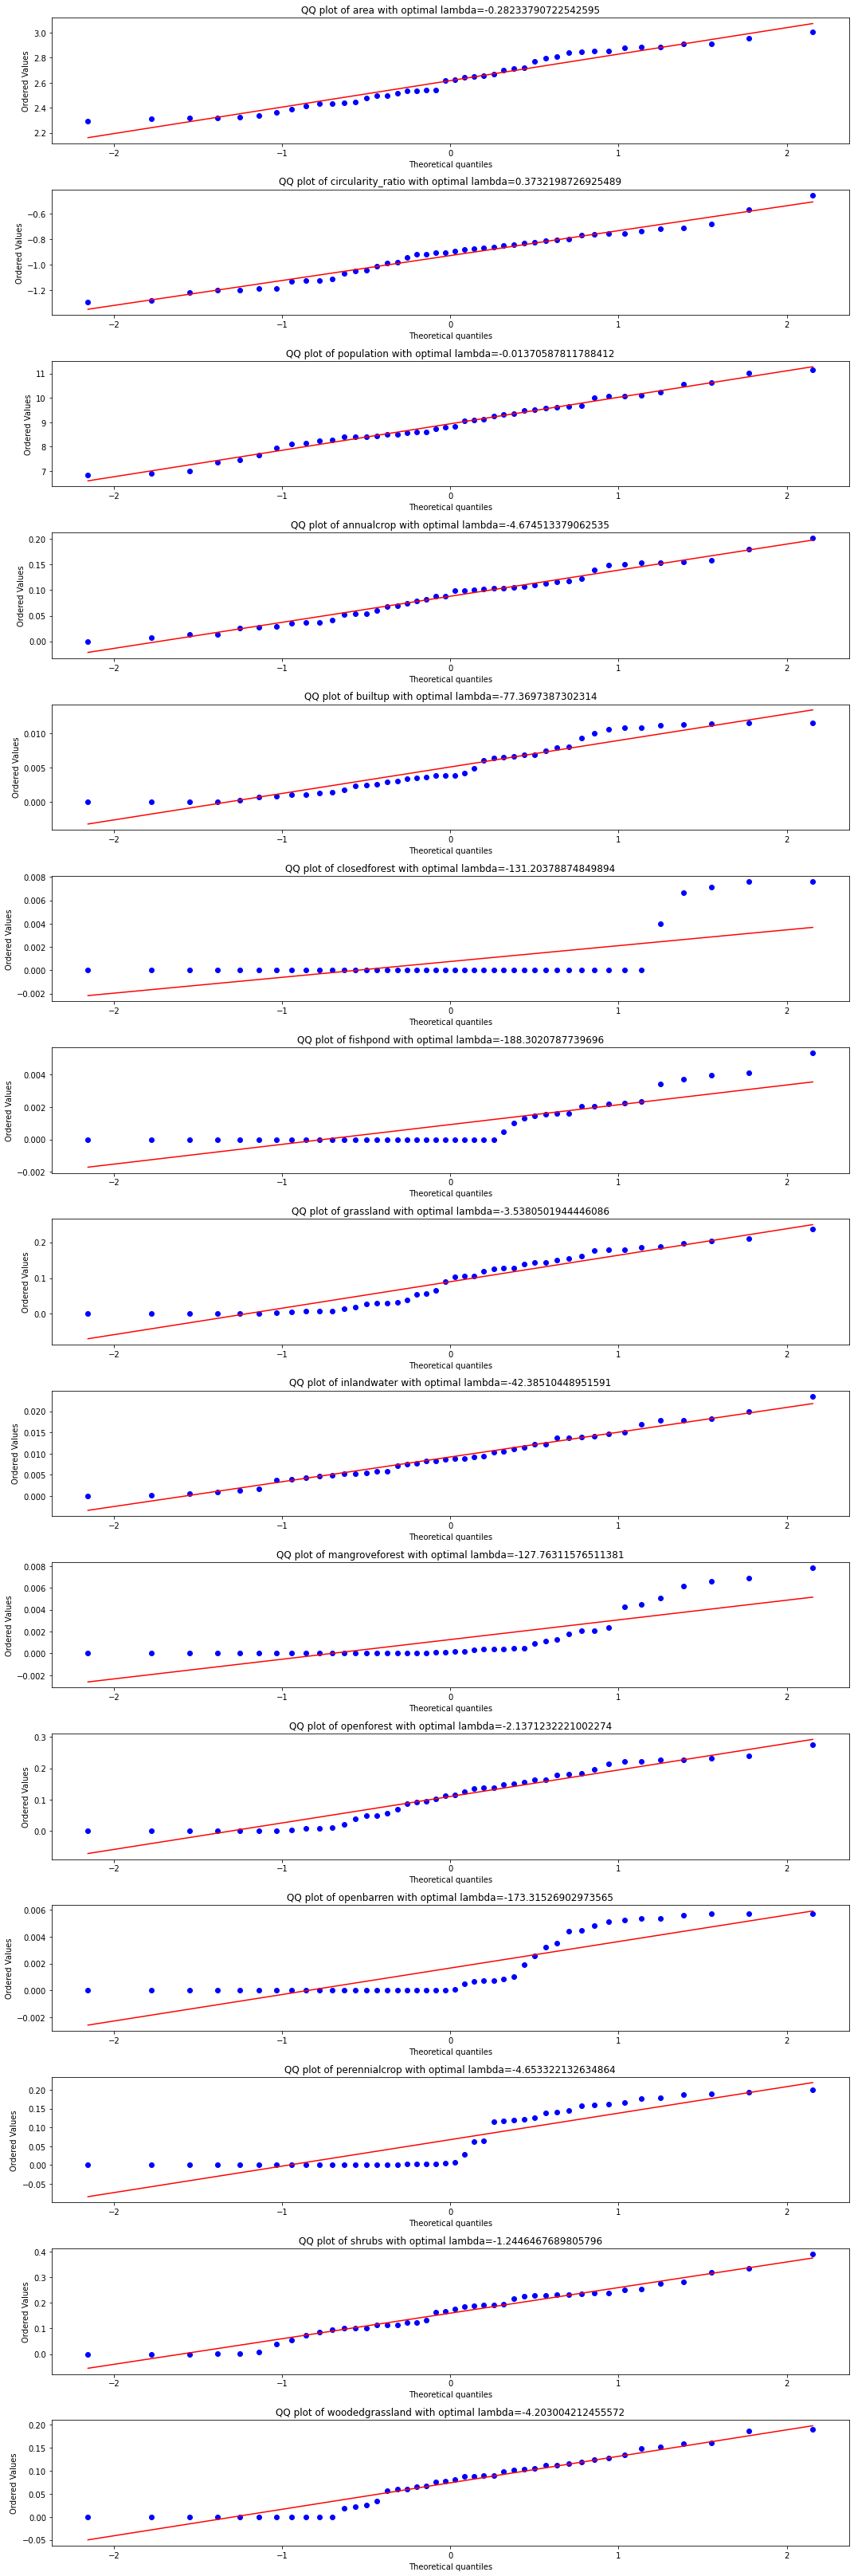

In [14]:
# box-cox on (1 + data) if it contains zero
# construct QQ plot of transformed variable using box-cox
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15,45))
box_cox_plus_one_results = []
for i, col in enumerate(numeric_cols):
    plt.sca(axes[i])
    # get the minimum value
    data_min = min(df[col])
    if data_min == 0:
        data = df[col] + 1
    else:
        data = df[col]
    # perform box cox transform on shifted data
    transformed, optimal_lambda = stats.boxcox(data)
    box_cox_plus_one_results.append({"variable" : col, "min_value" : data_min, "lambda" : optimal_lambda})
    stats.probplot(transformed, plot=sns.mpl.pyplot)
    axes[i].set_title(f"QQ plot of {col} with optimal lambda={optimal_lambda}")
plt.tight_layout()
fig.savefig("plots/qqplot_box_cox_plus_one.jpg")

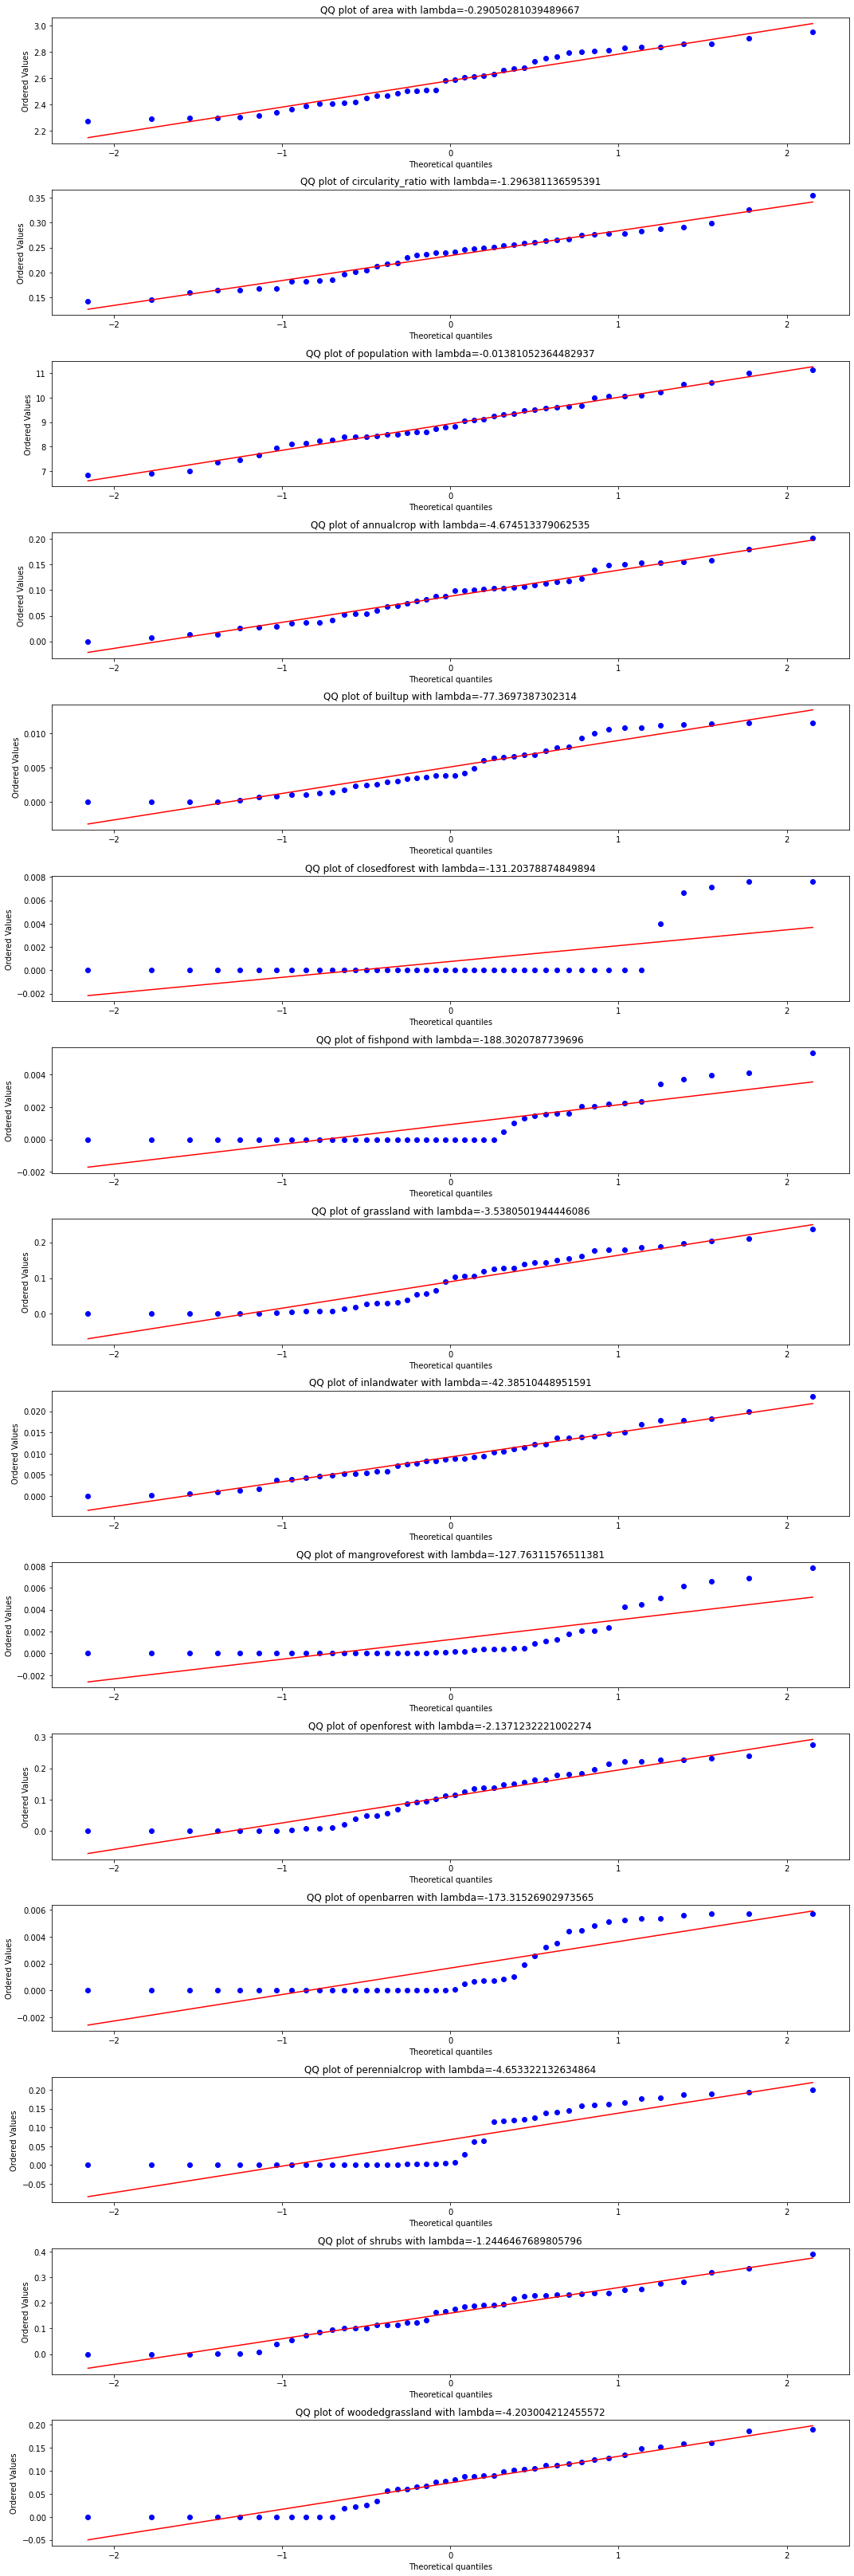

In [36]:
# construct QQ plot of transformed variable using box-cox
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15,45))
for i, col in enumerate(numeric_cols):
    plt.sca(axes[i])
    data = df[col] + 1
    transformed, optimal_lambda = stats.boxcox(data)
    stats.probplot(transformed, plot=sns.mpl.pyplot)
    axes[i].set_title(f"QQ plot of {col} with optimal lambda={optimal_lambda}")
plt.tight_layout()
fig.savefig("plots/qqplot_box_cox.jpg")

Adding a constant of 1 returns weird behavior after the box-cox transformation. Some values are too large ( > 100), which in my opinion isn't expected for this kind of data **[please verify this!]**

It is also expected that the lambda that we will get from this transformation will have some weird behavior if the minimum is zero.



In [15]:
# get the optimal lambda for the raw data + 1
box_cox_plus_one_df = pd.DataFrame(box_cox_plus_one_results)
box_cox_plus_one_df

,variable,min_value,lambda
0,area,40.300100,-0.282338
1,circularity_ratio,0.170606,0.373220
2,population,1305.000000,-0.013706
3,annualcrop,0.000000,-4.674513
4,builtup,0.000000,-77.369739
5,closedforest,0.000000,-131.203789
6,fishpond,0.000000,-188.302079
7,grassland,0.000000,-3.538050
8,inlandwater,0.000000,-42.385104
9,mangroveforest,0.000000,-127.763116


Box-Cox is suffering a lot to find the optimal lambda due to differences in scale, for example the values for ```closed_forest``` is much much smaller compared to 1. So a better strategy is to replace those zeros with some value that is closer to the next minimum value after zero.

One can choose to map zeroes to some multiple of the next minimum value.

### Box-Cox of data with zero mapped to the second minimum value

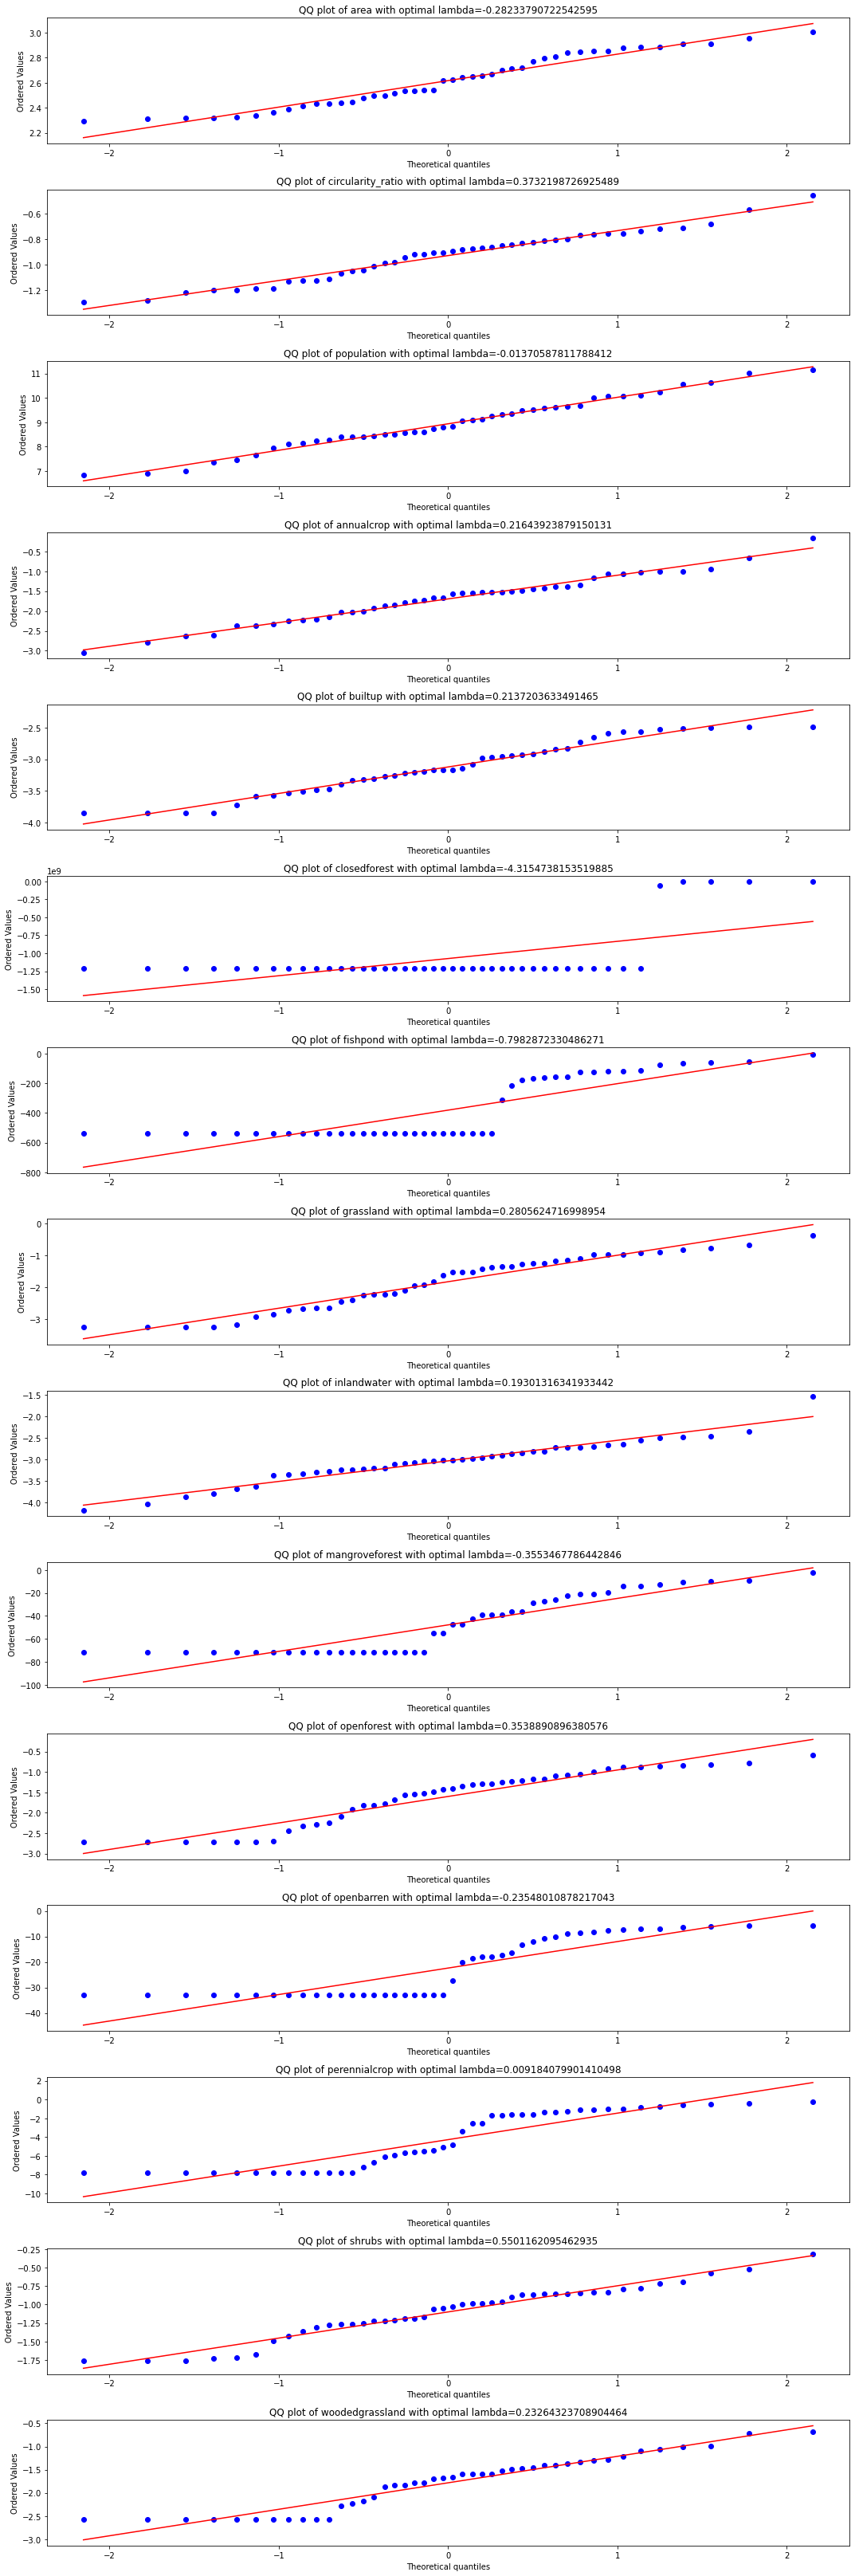

In [27]:
# box-cox on (1 + data) if it contains zero
# construct QQ plot of transformed variable using box-cox
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15,45))
box_cox_plus_second_min_results = []
for i, col in enumerate(numeric_cols):
    plt.sca(axes[i])
    # get the minimum value
    data_min = min(df[col])
    # add the second minimum value, if minimum value is zero
    # this is so that the new minimum value is the second min value of the original 
    if data_min == 0:
        col_df = pd.DataFrame(df[col])
        sorted_unique_vals = col_df.sort_values(col, ascending=True).drop_duplicates(keep="last").values
        second_min = sorted_unique_vals[1][0]
        data = df[col] + second_min
    else:
        data = df[col]
        second_min = None
    # perform box cox transform on shifted data
    transformed, optimal_lambda = stats.boxcox(data)
    box_cox_plus_second_min_results.append({"variable" : col, 
                                            "min_value" : data_min,
                                            "second_min" : second_min,
                                            "lambda" : optimal_lambda})
    stats.probplot(transformed, plot=sns.mpl.pyplot)
    axes[i].set_title(f"QQ plot of {col} with optimal lambda={optimal_lambda}")
plt.tight_layout()
fig.savefig("plots/qqplot_box_cox_plus_second_min.jpg")